In [95]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.optimize import curve_fit
import time

%matplotlib inline

today = time.strftime("%Y%m%d")
data = requests.get(f'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20170101&end={today}')
soup = BeautifulSoup(data._content, 'html.parser')

In [96]:
columns = [x.string for x in soup.find_all('th')]
columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [97]:
data = [x.string for x in soup.find_all('td')]
data[0:7]

['Nov 28, 2017',
 '9823.43',
 '10125.70',
 '9736.30',
 '10058.80',
 '6,348,820,000',
 '164,104,000,000']

In [98]:
df = pd.DataFrame(
    list(zip(
        pd.to_datetime(data[0::7]),
        data[1::7],
        data[2::7],
        data[3::7],
        data[4::7],
        data[5::7],
        data[6::7])),
    columns=columns,
    dtype=np.float64
)
df['Date'] = pd.to_datetime(df['Date'])
# df['Volume'] = df['Volume'].str.replace(',','').astype(float)
df['Market Cap'] = df['Market Cap'].str.replace(',','').astype(float)

In [99]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-11-28,9823.43,10125.70,9736.30,10058.80,"6,348,820,000",1.641040e+11
1,2017-11-27,9352.72,9818.35,9352.72,9818.35,"5,653,320,000",1.562210e+11
2,2017-11-26,8789.04,9522.93,8775.59,9330.55,"5,475,580,000",1.467890e+11
3,2017-11-25,8241.71,8790.92,8191.15,8790.92,"4,342,060,000",1.376320e+11
4,2017-11-24,8074.02,8374.16,7940.93,8253.69,"5,058,610,000",1.348160e+11


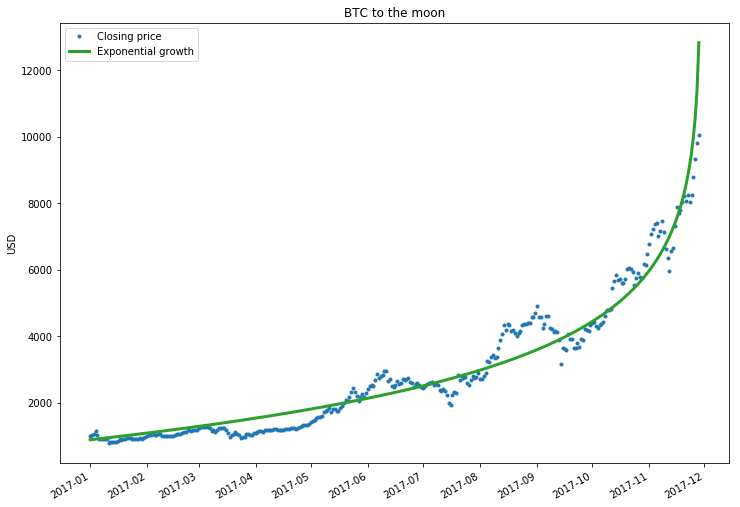

In [112]:
# logarithmic function
def func(x, p1, p2):
      return p1 * np.log(x) + p2

popt, pcov = curve_fit(func, df.index+1, df['Close'], p0=(-1000,10000))

# curve params
p1 = popt[0]
p2 = popt[1]
logfit = func(range(1, len(df) + 1), p1, p2)

# plot curve
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(df['Date'], df['Close'], '.', label='Closing price')
ax.plot(df['Date'], logfit, 'C2', lw=3, label='Exponential growth')
ax.set_title('BTC to the moon')
ax.set_ylabel('USD')
ax.legend()
fig.autofmt_xdate()